# Домашнее задание

- Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- [Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [32]:
with open('tom_1.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()
text = re.sub('[^а-яё ]','', text)

In [33]:
len(text)

649297

In [34]:
text = text.replace('  ',' ')
text = text.replace('  ',' ')
text = text.replace('  ',' ')
text = text.replace('  ',' ')
text = text.replace('  ',' ')
text = text.replace('  ',' ')
text = text.replace('  ',' ')
text = text.replace('  ',' ')
text = text.replace('  ',' ')
text = text.replace('  ',' ')

In [35]:
len(text)

640687

In [37]:
RUS = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUS)}

In [38]:
probabilities = np.zeros((len(RUS), len(RUS)))

In [39]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [40]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [41]:
df = pd.DataFrame(probabilities, index=(c for c in RUS), columns=(c for c in RUS))

In [46]:
df.head()

,а,б,в,г,д,е,ё,ж,з,и,...,ч,ш,щ,ъ,ы,ь,э,ю,я,
а,0.000243,0.009606,0.048891,0.013678,0.030233,0.012107,0.0,0.016909,0.056505,0.002103,...,0.010402,0.013855,0.003342,0.000000,0.000000,0.000000,0.000022,0.011000,0.039418,0.230291
б,0.078693,0.001720,0.002580,0.001290,0.000968,0.135885,0.0,0.000323,0.000108,0.050527,...,0.001720,0.000323,0.011180,0.004838,0.244786,0.003225,0.000108,0.000430,0.032036,0.016556
в,0.149333,0.000403,0.000807,0.000726,0.007138,0.107876,0.0,0.000000,0.013187,0.084486,...,0.000766,0.032060,0.000161,0.000403,0.068476,0.004194,0.000040,0.000040,0.003226,0.156067
г,0.059097,0.000000,0.004388,0.000000,0.049516,0.032414,0.0,0.000000,0.000090,0.046651,...,0.001254,0.000537,0.000000,0.000000,0.000179,0.000000,0.000000,0.000537,0.000000,0.047905
д,0.157326,0.001343,0.035897,0.000366,0.000794,0.167094,0.0,0.000488,0.000183,0.106410,...,0.000855,0.004029,0.000000,0.011111,0.025641,0.018926,0.000061,0.000549,0.014103,0.042125


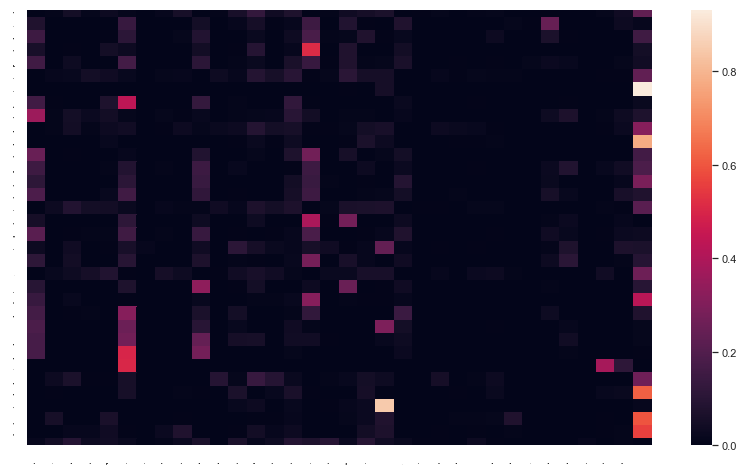

In [103]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [51]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUS)
sum_prob = 0
for c in RUS:
    for d in RUS:
        proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[d]] * probabilities[POS[d], end]
        if proba > 0:
            print(''.join(['п', c, d, 'р']), proba)
            sum_prob += proba
print(f'Total prob: {sum_prob}')

паар 1.4618370858596316e-08
пабр 1.245636714662361e-06
павр 9.364533744198805e-07
пагр 1.6642150855065495e-06
падр 3.779465873708077e-06
паер 1.942788338168043e-06
пазр 8.616030653461191e-07
паир 3.96359896978899e-08
пайр 1.0109776119453985e-07
пакр 5.4870654351217775e-06
памр 1.0896934685165306e-07
панр 9.124852709286146e-08
паор 5.837665138387188e-08
папр 4.553109469289517e-06
парр 7.826866277929914e-08
паср 5.021119445722548e-07
патр 6.118973432379137e-06
паур 7.338974300495314e-08
пафр 2.8792167545526385e-06
пахр 2.2653035753427564e-07
пачр 3.119141001117133e-08
пашр 8.566930296950475e-09
пащр 3.4785249689226015e-09
паэр 6.20049325598465e-10
паюр 2.1290437494453437e-07
паяр 1.2923608919248793e-07
па р 9.698941937895625e-06
пгар 4.3156981500217e-08
пгвр 1.0220858097496855e-09
пгдр 7.528452175710752e-08
пгер 6.326267734275789e-08
пгзр 1.6605702622856263e-11
пгир 1.0695587882340443e-08
пгкр 6.5232783161540814e-09
пгмр 2.1833700406475626e-11
пгнр 2.582384722050915e-10
пгор 6.3567703862

In [87]:
s = []
start = 'б'#np.random.choice(list(ENGLISH))
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUS), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бугичи а 


In [100]:
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [94]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [95]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

In [96]:
airlines_passengers = pd.read_csv("international-airline-passengers.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


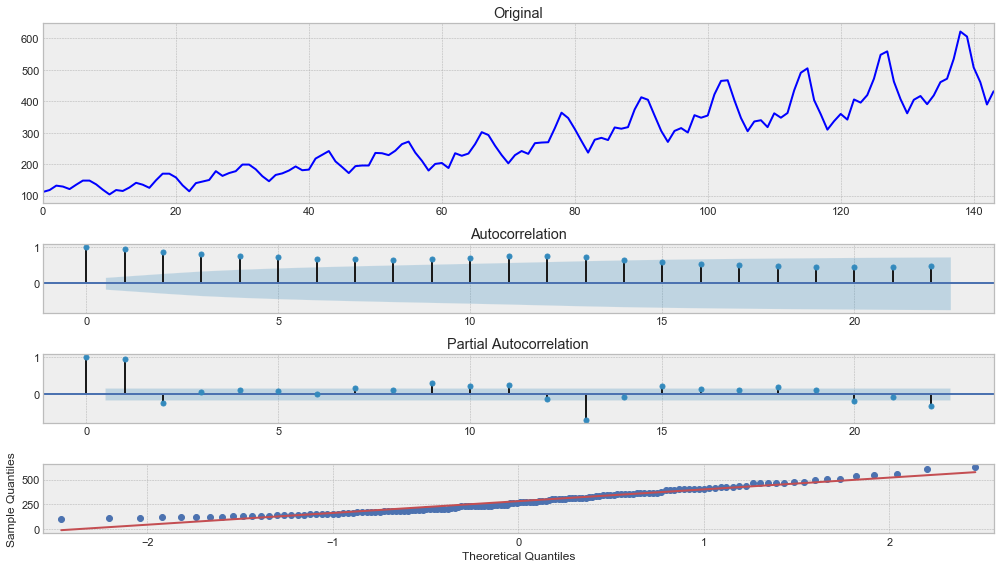

In [101]:
tsplot(airlines_passengers)

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


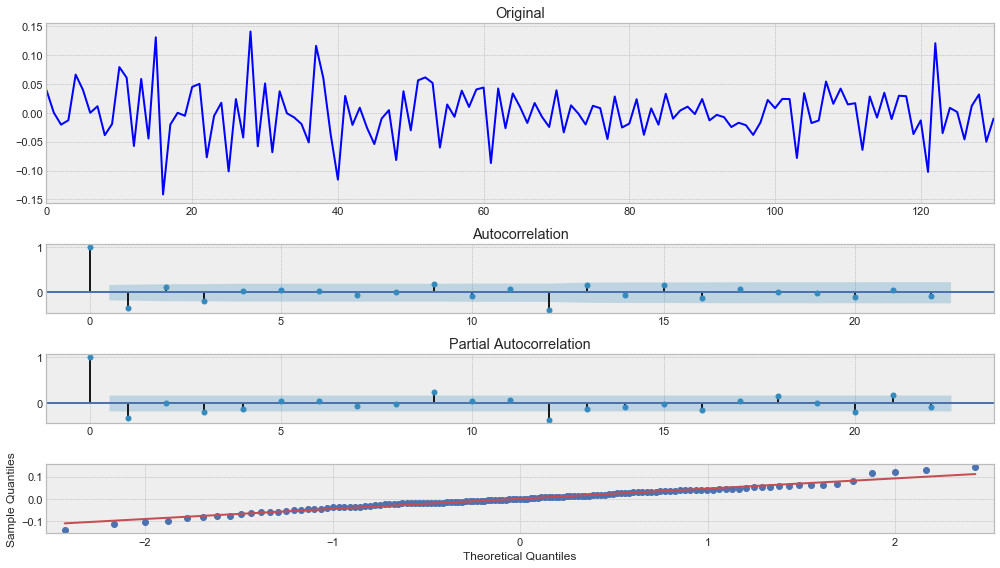

In [102]:
airlines_passengers_stat = boxcox(airlines_passengers,0)
airlines_passengers_stat = airlines_passengers_stat[1:] - airlines_passengers_stat[:-1]
airlines_passengers_stat = airlines_passengers_stat[12:] - airlines_passengers_stat[:-12]
tsplot(airlines_passengers_stat)

In [105]:
from hmmlearn.hmm import GaussianHMM

In [110]:
airlines_passengers_stat = pd.DataFrame(airlines_passengers_stat)
values = airlines_passengers_stat.values.reshape(-1,1)

In [113]:
for n in range(1, 20):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 218.37583783534652
2 221.91970776912618
3 232.11250952457783
4 232.76078735812112
5 230.77106354773815
6 232.7172128066345
7 231.77145268051882
8 232.75836487433864
9 233.7643217964631


Fitting a model with 142 free scalar parameters with only 131 data points will result in a degenerate solution.
Fitting a model with 167 free scalar parameters with only 131 data points will result in a degenerate solution.
Fitting a model with 194 free scalar parameters with only 131 data points will result in a degenerate solution.
Fitting a model with 223 free scalar parameters with only 131 data points will result in a degenerate solution.


10 233.80788598543313
11 217.90955484416244
12 217.59894052292123
13 216.78411154993256


Fitting a model with 254 free scalar parameters with only 131 data points will result in a degenerate solution.
Fitting a model with 287 free scalar parameters with only 131 data points will result in a degenerate solution.
Fitting a model with 322 free scalar parameters with only 131 data points will result in a degenerate solution.


14 216.61707854617646
15 215.9792446734779
16 215.1139630834865


Fitting a model with 359 free scalar parameters with only 131 data points will result in a degenerate solution.
Fitting a model with 398 free scalar parameters with only 131 data points will result in a degenerate solution.


17 214.4783589189046
18 213.74989924144634
19 213.42127883663377


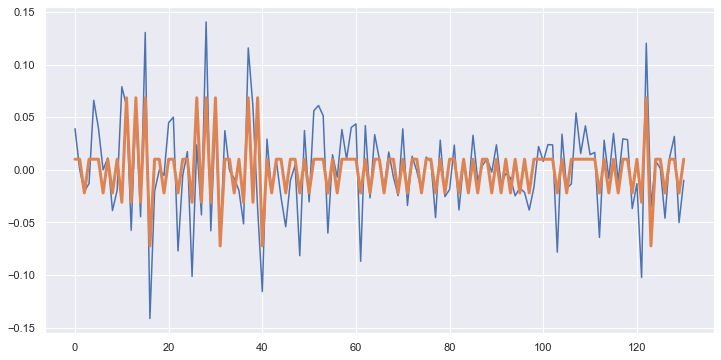

In [114]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [116]:
model.transmat_

array([[1.14258544e-022, 2.25996245e-144, 4.78521145e-009,
        9.99518571e-001, 5.62324819e-188, 2.24869202e-112,
        4.81424667e-004, 6.59291570e-168, 3.20816373e-027,
        1.90339975e-144],
       [9.99999502e-001, 1.14786954e-141, 2.52103408e-007,
        8.64055648e-008, 4.83103673e-169, 5.17668849e-094,
        1.59896352e-007, 3.06628765e-167, 1.41231843e-019,
        2.62201674e-119],
       [2.48278512e-004, 8.02320944e-141, 1.95819751e-002,
        4.24986207e-011, 2.88900090e-176, 1.09702389e-099,
        9.80169746e-001, 9.78750907e-167, 1.53462156e-018,
        9.34225411e-126],
       [4.61570843e-001, 1.56417141e-159, 9.76513986e-008,
        2.33254370e-041, 7.38749850e-171, 6.93221127e-099,
        9.06779513e-017, 2.27309917e-190, 5.38429060e-001,
        3.71554602e-125],
       [3.94717113e-027, 1.93137066e-152, 5.86422561e-005,
        8.99137231e-001, 0.00000000e+000, 6.79351325e-116,
        1.00804126e-001, 0.00000000e+000, 6.69617663e-027,
        5.1